In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Task 2.1 - Preprocessing
# importing the csv file and displaying first 10 elements of the dataframe

df = pd.read_csv('netflix_titles.csv')
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
# droping the rows with NaN value
df.dropna(subset=['director','cast','country','date_added','rating','duration'], inplace=True)
df.isnull().sum()
df.reset_index()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
4,24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5327,8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
5328,8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
5329,8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
5330,8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
#  Task 2.2 - Operations
df[(df['release_year']==2021) & (df['type']=='Movie')].reset_index()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
1,12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
2,81,s82,Movie,Kate,Cedric Nicolas-Troyan,"Mary Elizabeth Winstead, Jun Kunimura, Woody H...",United States,"September 10, 2021",2021,R,106 min,Action & Adventure,"Slipped a fatal poison on her final job, a rut..."
3,190,s191,Movie,Thimmarusu,Sharan Koppisetty,"Satya Dev, Priyanka Jawalkar, Brahmaji",India,"August 28, 2021",2021,TV-14,125 min,"Dramas, International Movies",Eight years after a young man is framed for mu...
4,231,s232,Movie,The Water Man,David Oyelowo,"David Oyelowo, Rosario Dawson, Lonnie Chavis, ...",United States,"August 25, 2021",2021,PG,92 min,"Children & Family Movies, Dramas","Desperate to save his ailing mother, 11-year-o..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,1410,s1411,Movie,Tribhanga - Tedhi Medhi Crazy,Renuka Shahane,"Kajol, Tanvi Azmi, Mithila Palkar, Kunaal Roy ...",India,"January 15, 2021",2021,TV-MA,96 min,"Dramas, International Movies","When her estranged mother falls into a coma, a..."
142,1411,s1412,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,"January 15, 2021",2021,TV-14,32 min,Documentaries,"In this delightful short documentary, an Itali..."
143,1412,s1413,Movie,Wish You,Sung Do-jun,"Kang In-soo, Lee Sang, Soo-bin",South Korea,"January 15, 2021",2021,TV-PG,102 min,"Dramas, International Movies, LGBTQ Movies","Singing and dreaming together, a talented sing..."
144,1424,s1425,Movie,Charming,Ross Venokur,"Wilmer Valderrama, Demi Lovato, Sia, Nia Varda...","Canada, United States, Cayman Islands","January 8, 2021",2021,TV-Y7,85 min,"Children & Family Movies, Comedies","On the eve of his 21st birthday, an adored pri..."


In [7]:
df[(df['type']=='Movie') & (df['title'].str.contains('Avengers')==True)].reset_index()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,5340,s5341,Movie,LEGO Marvel Super Heroes: Avengers Reassembled!,Rob Silvestri,"Laura Bailey, Troy Baker, Eric Bauza, Ben Disk...",United States,"August 6, 2017",2015,TV-Y7,22 min,Children & Family Movies,When Ultron seizes control of Iron Man's armor...
1,6200,s6201,Movie,Avengers: Infinity War,"Anthony Russo, Joe Russo","Robert Downey Jr., Josh Brolin, Mark Ruffalo, ...",United States,"December 25, 2018",2018,PG-13,150 min,"Action & Adventure, Sci-Fi & Fantasy",Superheroes amass to stop intergalactic sociop...


In [8]:
df['country'].unique()

array(['United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'United States', 'Germany, Czech Republic',
       'India', 'United States, India, France',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Japan', 'Nigeria',
       'Spain, United States', 'United Kingdom, United States',
       'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingdom, Canada', 'China, Hong Kong',
       'Canada', 'Hong Kong', 'United States, China, Hong Kong',
       'Italy, United States', 'United States, Germany', 'France',
       'United Kingdom, Canada, United States',
  

In [11]:
# Displaying the number of Movies/TV shows per country.
from collections import Counter
def count_unique_elements(value):
    elements = value.split(',') if isinstance(value, str) else [value]
    return Counter(elements)

unique_counts = {}
for column in df.columns:
    unique_counts[column] = df['country'].apply(count_unique_elements).sum()

unique_counts['country']

Counter({'United States': 2130,
         'India': 910,
         ' United States': 355,
         'United Kingdom': 347,
         'Canada': 166,
         ' France': 148,
         'France': 145,
         ' United Kingdom': 138,
         ' Canada': 129,
         'Spain': 122,
         ' Germany': 97,
         'Egypt': 95,
         'Japan': 91,
         'Nigeria': 89,
         'Turkey': 84,
         'Indonesia': 82,
         'Mexico': 81,
         'Philippines': 79,
         'Hong Kong': 75,
         'Germany': 70,
         ' Belgium': 66,
         'China': 58,
         'South Korea': 54,
         'Australia': 53,
         'Argentina': 52,
         ' China': 51,
         'Brazil': 51,
         'Thailand': 44,
         'Italy': 43,
         ' Spain': 39,
         'South Africa': 34,
         ' Japan': 33,
         ' Australia': 31,
         ' India': 30,
         ' Hong Kong': 23,
         ' Italy': 22,
         'Taiwan': 22,
         'Poland': 22,
         ' Mexico': 20,
         'United Ar

In [13]:
count_df = pd.DataFrame(unique_counts)
count_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
United States,2130,2130,2130,2130,2130,2130,2130,2130,2130,2130,2130,2130
Ghana,1,1,1,1,1,1,1,1,1,1,1,1
Burkina Faso,1,1,1,1,1,1,1,1,1,1,1,1
United Kingdom,138,138,138,138,138,138,138,138,138,138,138,138
Germany,97,97,97,97,97,97,97,97,97,97,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...
Panama,1,1,1,1,1,1,1,1,1,1,1,1
Slovenia,2,2,2,2,2,2,2,2,2,2,2,2
East Germany,1,1,1,1,1,1,1,1,1,1,1,1
Croatia,1,1,1,1,1,1,1,1,1,1,1,1


In [14]:
count_df['count'] = count_df['type']
count_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'count'],
      dtype='object')

In [15]:
count_df.drop(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'] , inplace = True , axis=1)
count_df

,count
United States,2130
Ghana,1
Burkina Faso,1
United Kingdom,138
Germany,97
...,...
Panama,1
Slovenia,2
East Germany,1
Croatia,1


In [17]:
# New dataFrame displaying the count of Movies|Tv shows of each country
count_df = count_df.sort_values('count',ascending=False)
count_df.head(5)

,count
United States,2130
India,910
United States,355
United Kingdom,347
Canada,166


In [20]:
df.to_csv('Synapse.csv')
count_df.to_csv('count.csv')

In [35]:
# Task 2.3 - Chart
c_country = count_df.index
c_value = count_df['count'].unique()

([<matplotlib.patches.Wedge at 0x20e3a91e1d0>,
 [Text(-0.1551139695412688, 1.0890085658309354, 'United States'),
  Text(-0.5808432668133382, -0.9341419053856911, 'India'),
  Text(0.4889614774297553, -0.9853510407919155, ' United States'),
  Text(0.9401609019996331, -0.5710494535075193, 'United Kingdom'),
  Text(1.0902203237936128, -0.14635452021495776, 'Canada')],
 [Text(-0.08460761974978298, 0.5940046722714192, '54.50%'),
  Text(-0.31682360008000265, -0.5095319483921951, '23.29%'),
  Text(0.26670626041623013, -0.5374642040683175, '9.08%'),
  Text(0.5128150374543452, -0.3114815200950105, '8.88%'),
  Text(0.5946656311601524, -0.07982973829906785, '4.25%')])

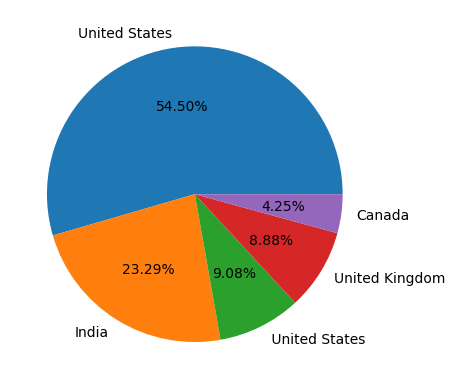

In [37]:
# creating pie chart
plt.pie(c_value[:5] , labels = c_country[:5] , autopct='%1.2f%%')